#Car Price Prediction with ML Algorithms
Car price prediction is an important task for car dealers, customers, and manufacturers. By using regression models, we can predict the price of a given car based on its features like make, model, year and other parameters. These models help to get a better understanding of the pricing data of different cars in the market. This will enable us to make better decisions when it comes to buying or selling a car. It also provides us with insights into the trends in the car industry that can be used by manufacturers and dealers to make better business decisions.

 A Car Price Prediction model which takes user inputs as their name of the car, model of the car, fuel_type etc. and makes a prediction of how much price that a car has by considering these categories.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

##Dataset


In [68]:
# Import dataframe from the csv file
# Understand the loaded dataframe
def load_dataset():
    # Load the dataframe from the csv file
    df = pd.read_csv('/content/quikr_car.csv')

    # Sum of the null values in the dataset
    print("")
    print("Sum of the NaN values: ")
    print(df.isnull().sum())

    # Get types of the dataframe
    print("")
    print("Dataframe types: ")
    print(df.dtypes)

    return df

df = load_dataset()



Sum of the NaN values: 
name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

Dataframe types: 
name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object


In [69]:
# Process the dataframe
def process_dataframe(df):
    # The column 'year' has many non-year values and hence it is in object.
    # We need to fix it to integer value
    # Convert non-year values to NaN (or any other handling strategy you prefer)
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    # Drop rows with NaN values in 'year' column
    df.dropna(subset=['year'], inplace=True)
    # Convert 'year' column to integer type
    df['year'] = df['year'].astype(int)

    # Now we do the same thing to the column 'Price'
    # Drop rows where 'price' column has "Ask for Price"
    df = df[~df['Price'].str.strip().str.contains('Ask for Price', case=False)].copy()
    # Remove commas from 'price' column and convert it to integer
    df['Price'] = df['Price'].str.replace(',', '').astype(int)

    # We also need to do the same thing to the column 'kms_driven
    # Remove "kms" and "," from 'kms_driven' column
    df['kms_driven'] = df['kms_driven'].str.replace('kms', '').str.strip()
    df['kms_driven'] = df['kms_driven'].str.replace(',', '')
    # Convert 'kms_driven' column to integer type
    df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')
    # Drop rows with NaN values in 'kms_driven' column
    df.dropna(subset=['kms_driven'], inplace=True)
    # Convert 'kms_driven' column to integer type after handling NaNs
    df['kms_driven'] = df['kms_driven'].astype(int)

    #fuel_type has nan values. drop these rows
    df.dropna(subset=['fuel_type'], inplace=True)

    return df

df = process_dataframe(df)
print("")
print("Processed dataframe: ")
print(df.head())


Processed dataframe: 
                                     name   company  year   Price  kms_driven  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007   80000       45000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006  425000          40   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014  325000       28000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014  575000       36000   
6                               Ford Figo      Ford  2012  175000       41000   

  fuel_type  
0    Petrol  
1    Diesel  
3    Petrol  
4    Diesel  
6    Diesel  


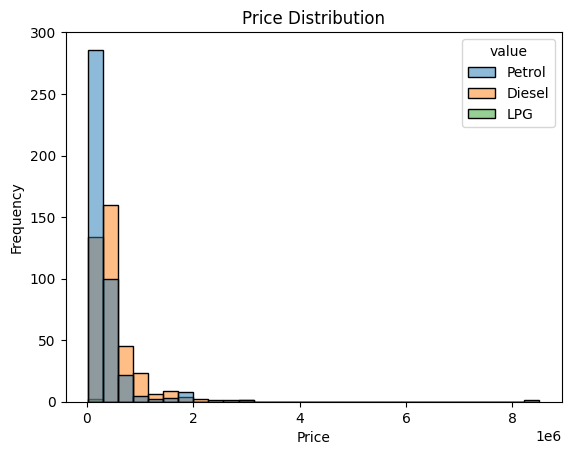

In [70]:
# Plot the dataframe to see the structure and correlation
# Plot histogram on "price" column with hue as 'fuel_type'
# also save the plot in plotting folder
# Melt the dataframe to long-form
df_melted = df.melt(id_vars=['Price'], value_vars=['fuel_type'])

# Plot the histogram
ax = sns.histplot(data=df_melted, x='Price', hue='value', bins=30, kde=False)
ax.set_title('Price Distribution')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

plt.show()

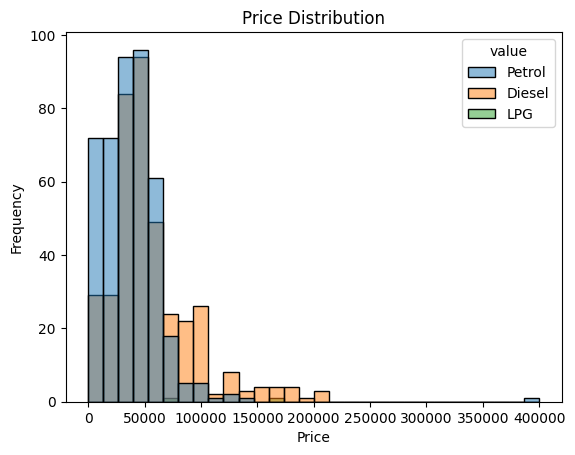

In [71]:
# Plot histogram on "kms_driven" column with hue as 'fuel_type'
# also save the plot in plotting folder
# Melt the dataframe to long-form
df_melted = df.melt(id_vars=['kms_driven'], value_vars=['fuel_type'])

# Plot the histogram
ax = sns.histplot(data=df_melted, x='kms_driven', hue='value', bins=30, kde=False)
ax.set_title('Price Distribution')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

plt.show()

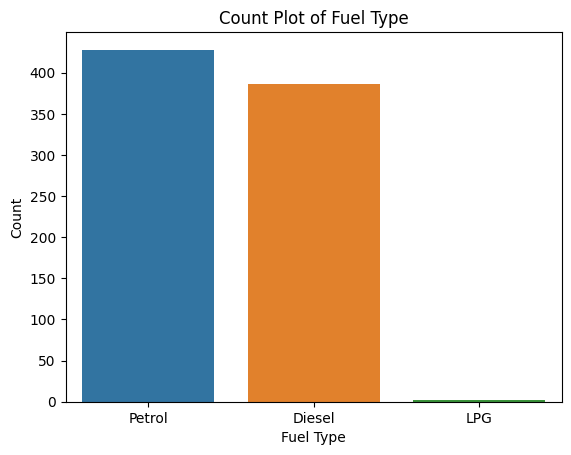

In [72]:
# Plot countplot using seaborn for the 'fueltype' column
ax = sns.countplot(data=df, x='fuel_type')

# Set title and labels
ax.set_title('Count Plot of Fuel Type')
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Count')

plt.show()

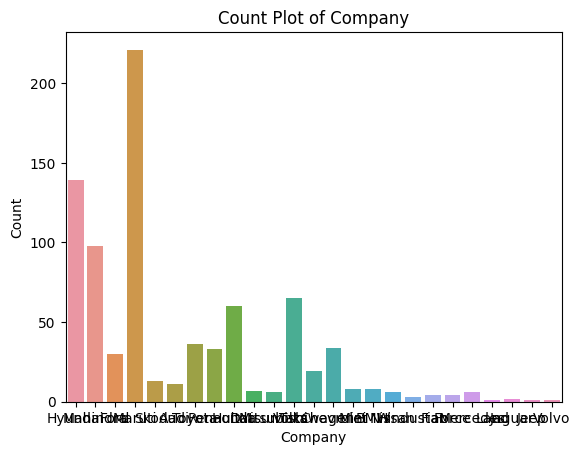

In [73]:
#plot using countplot on company column
ax = sns.countplot(data=df, x='company')

# Set title and labels
ax.set_title('Count Plot of Company')
ax.set_xlabel('Company')
ax.set_ylabel('Count')

plt.show()

##Feature Engineering

In [74]:
# One-hot encoding the three columns: "name", "company", and "fuel_type"
def one_hot_encoding(df):
    # One-hot encoding the three columns: "name", "company", and "fuel_type"
    df = pd.get_dummies(df, columns=['name', 'company', 'fuel_type'])

    return df

df = one_hot_encoding(df)

##Splite the dataset for train and test

In [75]:
def feauture_separating_x_y(df):
    # Select X and y
    X = df.drop(columns=['Price'])
    y = df['Price']

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = feauture_separating_x_y(df)
print("")
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (652, 493)
X_test shape:  (164, 493)
y_train shape:  (652,)
y_test shape:  (164,)


##Build Linear Regression with sckit-learn

In [62]:
# Please learn how to use scikit learn packages
# Use LinearRegression from scikit learn to build a linear regression model
# Use X and y to fit the model
# Use the 'mean_squared_error' from scikit learn to calculate mse
# Use the 'r2_score' from scikit learn to calculate r-squared
# Fit the linear regression model and calculate the mse and r-squared score

# Hint: Check what I do for the project "House Price Prediction with ML Algorithms"
def fit_linear_regression(X, y):
    pass

model = fit_linear_regression(X_train, y_train)


MSE:  30395117075.308872
R-squared:  0.7380789694949454
